#Data Checking

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import datetime as dt

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
##Read File
df1 = pd.read_csv("/content/data_donasi.csv")

In [ ]:
##Check File
df1.head()

,ID_Donatur,Nama_Donatur,muzaki,ID_Donasi,Tanggal,Akad,Program,Metode_Pembayaran,Nominal_Donasi,Kantor_Pelayanan
0,6DCCB702-33E8-E520-6409-AA1B5CFCAA2D,RITA,RITA,00040613-FCFE-591B-F48C-6FB3C7006977,2019-10-19 17:51:00,Sedekah,Asrama Yatim,EDC,500000,KP029
1,672ED199-1E89-9A5B-2A67-5227326E504A,ADJI WIDODO,ADJI WIDODO,0008A1AF-339A-A6EB-4B70-B43186819F4D,2021-08-29 17:33:00,Sedekah,LEBARAN YATIM 2021,EDC,2000000,KP041
2,82A3E3CC-10C9-EC52-0956-8106F39118BF,AGUS PRATOMO OKTORIANTO,AGUS PRATOMO OKTORIANTO,000AD04E-1D2F-4636-370A-322AD9106DE2,2019-11-03 16:19:00,Sedekah,Pangan Santri Yatim,EDC,5000000,KP005
3,9D1B61F4-8D4F-1EDE-FF67-99C9D24310D7,kel.ibu novia,Ibu novia,000B891E-C6F3-647A-986D-15291F793385,2019-05-01 14:04:00,Sedekah,NaN,EDC,500000,KP015
4,1D953344-B288-AE6C-4DE1-FAF39C14D653,"HENNI HAMIDAH,",BUNDA HENNI HAMIDAH,000FF0C3-73CC-8E00-B150-A99261F61A02,2020-06-01 14:29:00,Infaq,Sedekah dan Infaq untuk Anak Yatim,EDC,500000,KP036


In [ ]:
##Tipe Data
df1.dtypes

ID_Donatur           object
Nama_Donatur         object
muzaki               object
ID_Donasi            object
Tanggal              object
Akad                 object
Program              object
Metode_Pembayaran    object
Nominal_Donasi        int64
Kantor_Pelayanan     object
dtype: object

In [ ]:
##Banyak Data
df1.shape

(277442, 10)

In [ ]:
##Check nilai kosong
df1.isna().sum()

ID_Donatur                0
Nama_Donatur              1
muzaki                 1806
ID_Donasi                 0
Tanggal                   0
Akad                      0
Program              170014
Metode_Pembayaran         0
Nominal_Donasi            0
Kantor_Pelayanan          0
dtype: int64

In [ ]:
##Handling missing value
df1["Nama_Donatur"] = df1["Nama_Donatur"].fillna("Unknown")

In [ ]:
##Handling missing value
df1["muzaki"] = df1["muzaki"].fillna("Unknown")

In [ ]:
##Handling missing value
df1["Program"] = df1["Program"].fillna("No Category")

In [ ]:
##Drop Duplicate
df1.drop_duplicates(inplace= True)

In [ ]:
##Check Missing Value
df1.isna().sum()

ID_Donatur           0
Nama_Donatur         0
muzaki               0
ID_Donasi            0
Tanggal              0
Akad                 0
Program              0
Metode_Pembayaran    0
Nominal_Donasi       0
Kantor_Pelayanan     0
dtype: int64

In [ ]:
df1.sort_values(by= 'Tanggal',inplace= True)

In [ ]:
df1.head(3)

,ID_Donatur,Nama_Donatur,muzaki,ID_Donasi,Tanggal,Akad,Program,Metode_Pembayaran,Nominal_Donasi,Kantor_Pelayanan
159617,0AD64182-16C2-9675-EB4A-2F4C75A0AD49,EFENDI,Efendi,800303FA-C94B-DF0A-7C44-0C37F8F3B1CF,2019-01-01 20:45:00,Sedekah,No Category,Tunai,200000,KP044
245763,0427EF05-ABFD-EB37-243C-580C687BE822,EMI ANGGRAENI,EMI ANGGRAENI,DD51B141-16D1-CDA0-22F8-40E75D0799D1,2019-01-02 16:00:00,Zakat,No Category,Tunai,200000,KP044
209441,FE57CE3F-880E-9D3B-3781-035B4B7879B0,Enggi W,Enggi W,B60AEA85-8EB4-29BF-18D0-3A9B4C3FF639,2019-01-02 16:00:00,Zakat,No Category,Tunai,100000,KP044


In [ ]:
df1.tail(3)

,ID_Donatur,Nama_Donatur,muzaki,ID_Donasi,Tanggal,Akad,Program,Metode_Pembayaran,Nominal_Donasi,Kantor_Pelayanan
12104,5B7AE406-6E40-5EB8-5BCD-C13EF3A2C7CD,ZENOBIA PT GEODIS,ZENOBIA,0208318D-D1EB-7586-4D2C-06D3E420FB87,2022-01-17 13:39:00,Sedekah,No Category,Transfer,500000,KP005
97535,AD9AA97B-845C-B7BA-1A26-8235AD2C7683,bp suyanto,Bpk Suyanto,3D0A329F-4A16-7472-F711-FC66E5FB2CFF,2022-01-17 13:50:00,Zakat,No Category,Tunai,600000,KP002
155846,87CB8106-C003-8B49-9796-855AC3BA965E,DHAVA ABIYYU AL FATIH,DHAVA ABIYYU AL FATIH,7BDC430B-61C2-0518-FC00-FA9E084E4837,2022-01-17 15:14:00,Zakat Profesi,Tunaikan Zakat Penghasilan,Tunai,150000,KP011


In [ ]:
df1.Nominal_Donasi.min()

0

In [ ]:
df1['Tanggal'] = pd.to_datetime(df1['Tanggal'])

#FORECASTING

##Data Preparation

In [ ]:
df2 = df1[['Tanggal', 'Nominal_Donasi']]

In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2.drop(labels='index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df2 = df2.groupby([df2['Tanggal'].dt.date]).agg({'Nominal_Donasi': lambda x: x.sum()})

In [ ]:
df2.head()

,Nominal_Donasi
Tanggal,
2019-01-01,200000
2019-01-02,600000
2019-01-03,300000
2019-01-04,250000
2019-01-05,300000


In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2['Tanggal']=df2['Tanggal'].astype('string')

In [ ]:
Bulan= []

In [ ]:
for i in df2['Tanggal']:
  a = i[:7]
  Bulan.append(a)

In [ ]:
dat1 = {'Bulan':Bulan}

In [ ]:
df_bulan= pd.DataFrame(data= dat1)

In [ ]:
df_bulan.iloc[500:505]

,Bulan
500,2020-05
501,2020-05
502,2020-05
503,2020-05
504,2020-05


In [ ]:
df2_bulan = pd.concat([df2,df_bulan], axis= 1)

In [ ]:
df2_bulan.tail()

,Tanggal,Nominal_Donasi,Bulan
1106,2022-01-13,102628000,2022-01
1107,2022-01-14,273461199,2022-01
1108,2022-01-15,81453000,2022-01
1109,2022-01-16,110866500,2022-01
1110,2022-01-17,13730000,2022-01


In [ ]:
df2_bulan.drop(labels= "Tanggal", axis =1, inplace= True)

In [ ]:
df2_bulan = df2_bulan.groupby(df2_bulan['Bulan']).agg({'Nominal_Donasi': lambda x: x.sum()})

In [ ]:
df2_bulan.reset_index(inplace=True)

In [ ]:
df2_bulan.dtypes

Bulan             object
Nominal_Donasi     int64
dtype: object

In [ ]:
df2_bulan['Bulan']= pd.to_datetime(df2_bulan['Bulan'])

In [ ]:
df2_bulan= df2_bulan.set_index(['Bulan'])

##Data check Stationary

In [ ]:
dfbulan_diff = df2_bulan.diff(periods=1)

In [ ]:
dfbulan_diff = dfbulan_diff[1:]

##Visualisasi Data Forecasting

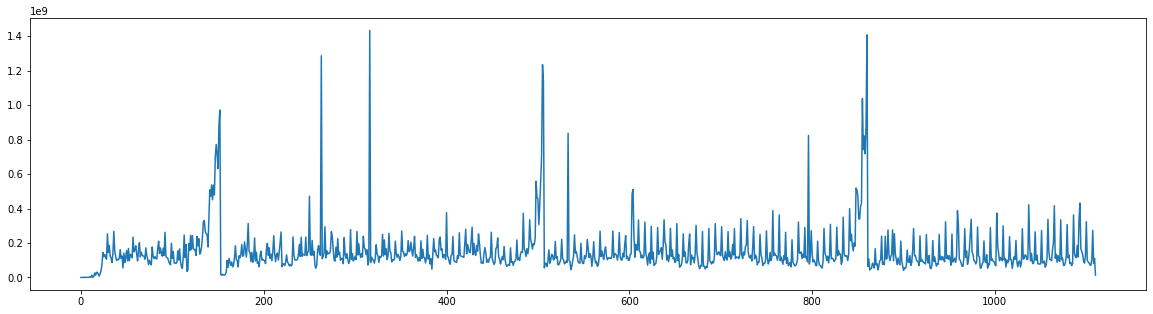

In [ ]:
#Visualisasi  Harian
df2.Nominal_Donasi.plot(figsize=(20,5))

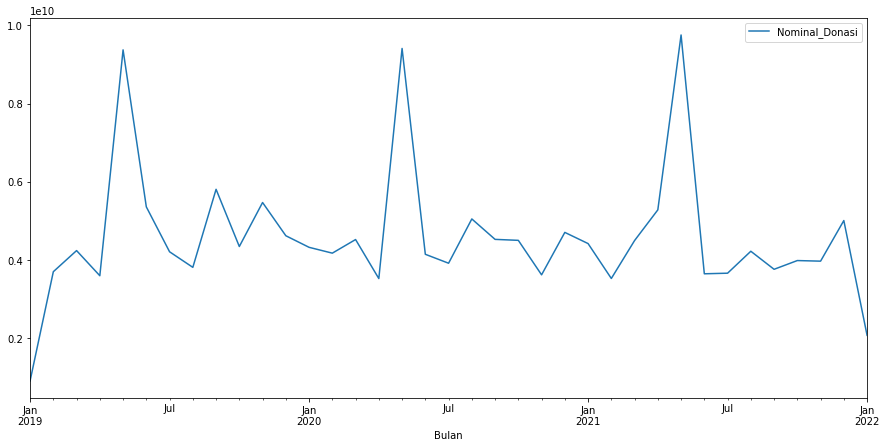

In [ ]:
df2_bulan.plot(figsize=(15,7))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


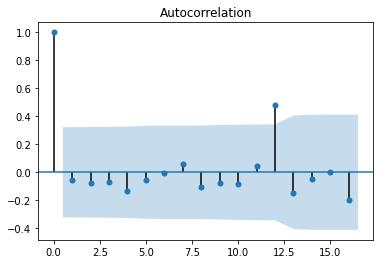

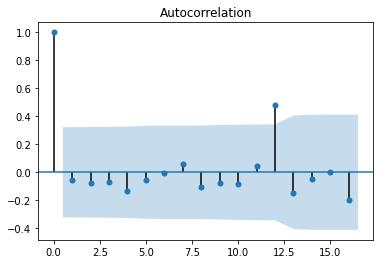

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2_bulan)

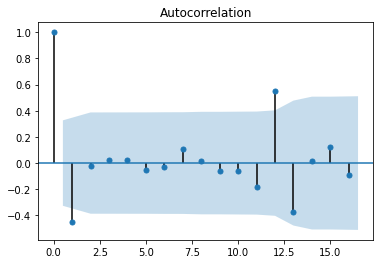

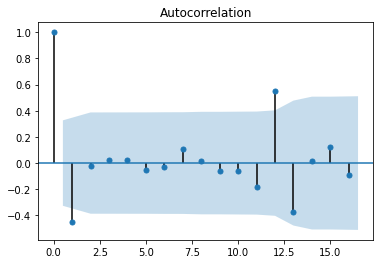

In [ ]:
plot_acf(dfbulan_diff)

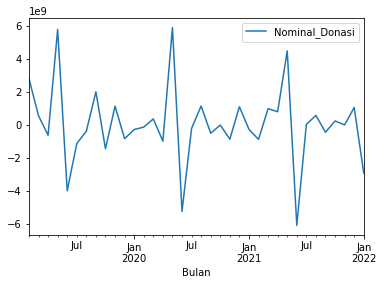

In [ ]:
dfbulan_diff.plot()

##DATA JANUARI 2022

In [ ]:
all_januari = [df2_bulan.iloc[12,0],df2_bulan.iloc[24,0]]
print(np.mean(all_januari))
print(df2_bulan.iloc[36,0]*1.9)

4374920700.0
3947344633.2999997


In [ ]:
df2_bulan.iloc[36,0] = np.mean(all_januari) 

In [ ]:
df2_bulan.tail(1)

,Nominal_Donasi
Bulan,
2022-01-01,4374920700


##Split Dataset for TRAIN and TEST

In [ ]:
X_data = df2_bulan.Nominal_Donasi

In [ ]:
print(len(X_data))

37


In [ ]:
#membagi dataset
train = X_data[:27]

In [ ]:
test= X_data[27:]

In [ ]:
print(len(test), len(train))

10 27


##AR Model

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
predictions_AR = []

In [ ]:
model_ar = AR(train)

In [ ]:
model_ar_fit = model_ar.fit()

In [ ]:
predictions_AR =model_ar_fit.predict(start= 27, end= 36)

In [ ]:
test

Bulan
2021-04-01    5284449915
2021-05-01    9755020955
2021-06-01    3650383905
2021-07-01    3665498605
2021-08-01    4226525632
2021-09-01    3765171862
2021-10-01    3988618115
2021-11-01    3973212290
2021-12-01    5011302755
2022-01-01    4374920700
Name: Nominal_Donasi, dtype: int64

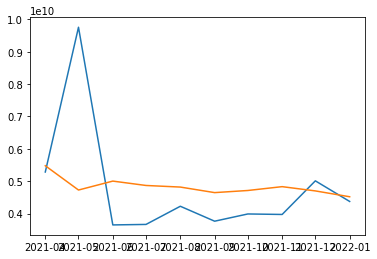

In [ ]:
plt.plot(test)
plt.plot(predictions_AR)

##ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train,order=(1,1,1)) # (p -> AR, d -> I (stationarity) , q -> MA)
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

1191.295691126019


In [ ]:
predictions_arima=model_arima_fit.predict(start=27,end=36, typ='levels').rename('ARIMA')
predictions_arima

2021-04-01    4.751738e+09
2021-05-01    4.880899e+09
2021-06-01    5.019575e+09
2021-07-01    5.157512e+09
2021-08-01    5.295506e+09
2021-09-01    5.433496e+09
2021-10-01    5.571486e+09
2021-11-01    5.709477e+09
2021-12-01    5.847467e+09
2022-01-01    5.985457e+09
Freq: MS, Name: ARIMA, dtype: float64

In [ ]:
test

Bulan
2021-04-01    5284449915
2021-05-01    9755020955
2021-06-01    3650383905
2021-07-01    3665498605
2021-08-01    4226525632
2021-09-01    3765171862
2021-10-01    3988618115
2021-11-01    3973212290
2021-12-01    5011302755
2022-01-01    4374920700
Name: Nominal_Donasi, dtype: int64

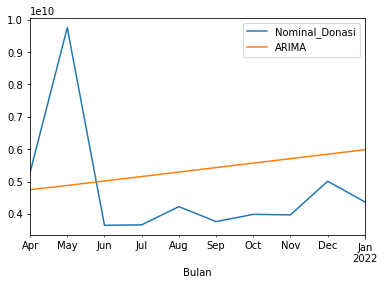

In [ ]:
test.plot(legend=True)
predictions_arima.plot(legend=True)

In [ ]:
##MODEL EVALUATION
print("ARIMA")
print("MAE: ",mean_absolute_error(test,predictions_arima))
print("MSE: ",mean_squared_error(test,predictions_arima))
print("RMSE: ", np.sqrt(mean_squared_error(test,predictions_arima)))
print("R2: ",r2_score(test,predictions_arima))
print("")

ARIMA
MAE:  1677117524.8683372
MSE:  4.088074057100273e+18
RMSE:  2021898626.8110163
R2:  -0.34682837518532517



## Hyperparameter Tunning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import itertools

In [ ]:
p=q=range(0,5)

In [ ]:
d = range(0,2)

In [ ]:
pdq =list(itertools.product(p,d,q))

In [ ]:
for param in pdq:
  try:
    model=ARIMA(train,order=param) # (p -> AR, d -> I (stationarity) , q -> MA)
    results=model.fit()
    print(param,results.aic)
  except:
    continue
    

(0, 0, 0) 1225.2212979034432
(0, 0, 1) 1226.964937549175
(0, 0, 2) 1228.196300586616
(0, 0, 3) 1229.8306642881407
(0, 0, 4) 1230.773243423507
(0, 1, 0) 1198.3954832692073
(0, 1, 1) 1189.3785239915628
(1, 0, 0) 1227.0198247876697
(1, 1, 0) 1193.3655681341418
(1, 1, 1) 1191.295691126019
(1, 1, 2) 1192.265437203581
(1, 1, 3) 1195.2845671547516
(2, 0, 0) 1228.7893271163607
(2, 0, 1) 1229.2401045489446
(2, 0, 2) 1231.2478488797503
(2, 1, 0) 1192.3866471087997
(2, 1, 1) 1193.2634548034293
(2, 1, 2) 1194.0950094459781
(2, 1, 3) 1197.2922518901578
(3, 0, 0) 1230.67848499814
(3, 0, 1) 1231.257967085048
(3, 0, 2) 1232.2681637794435
(3, 1, 0) 1194.0279426221814
(3, 1, 1) 1195.2017991141024
(3, 1, 2) 1197.26356125488
(3, 1, 4) 1199.2350942411233
(4, 0, 0) 1230.9042677722678
(4, 0, 1) 1234.67851334883
(4, 0, 2) 1234.3358727787622
(4, 0, 3) 1235.6097076526733
(4, 1, 0) 1195.687769304673
(4, 1, 1) 1197.002494043018
(4, 1, 2) 1196.6271514684565
(4, 1, 4) 1200.6943757958775


## FORECAST INTO FUTURE

In [ ]:
# Forecast into future
model=ARIMA(df3['Nominal_Donasi'],order=(1,1,1))
results=model.fit()
fcast=results.predict(start=len(df3),end=len(df3)+12,typ='levels').rename('ARIMA(1,1,1) forecast')

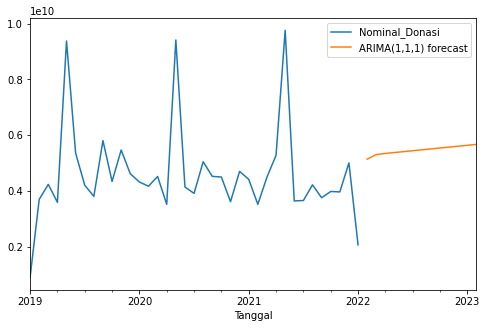

In [ ]:
df3['Nominal_Donasi'].plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)

##SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train,order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
predictions1=results.predict(start=27,end=36,typ='levels').rename('SARIMAX Predictions')

In [ ]:
predictions2=results.predict(start=0,end=26,typ='levels').rename('SARIMAX Predictions')

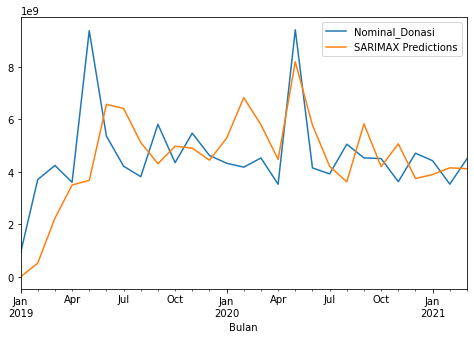

In [ ]:
train.plot(legend=True,figsize=(8,5))
predictions2.plot(legend=True)

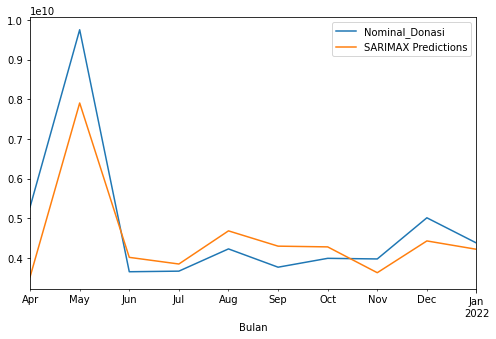

In [ ]:
test.plot(legend=True,figsize=(8,5))
predictions1.plot(legend=True)

In [ ]:
print("SARIMAX TRAIN")
print("MAE: ",mean_absolute_error(train,predictions2))
print("MSE: ",mean_squared_error(train,predictions2))
print("RMSE: ", np.sqrt(mean_squared_error(train,predictions2)))
print("R2: ",r2_score(train,predictions2))
print("")

SARIMAX TRAIN
MAE:  1311730142.3860214
MSE:  2.992410938072787e+18
RMSE:  1729858646.84742
R2:  -0.16191522043310402



In [ ]:
print("SARIMAX")
print("MAE: ",mean_absolute_error(test,predictions1))
print("MSE: ",mean_squared_error(test,predictions1))
print("RMSE: ", np.sqrt(mean_squared_error(test,predictions1)))
print("R2: ",r2_score(test,predictions1))
print("")

SARIMAX
MAE:  651695866.4901639
MSE:  7.743182956454547e+17
RMSE:  879953575.8467345
R2:  0.7448984931696265



In [ ]:
model=SARIMAX(df2_bulan['Nominal_Donasi'],order=(1,1,1),seasonal_order=(1,0,0,12))
results=model.fit()
fcast=results.predict(start=len(df2_bulan),end=len(df2_bulan)+10,typ='levels').rename('SARIMAX Forecast')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


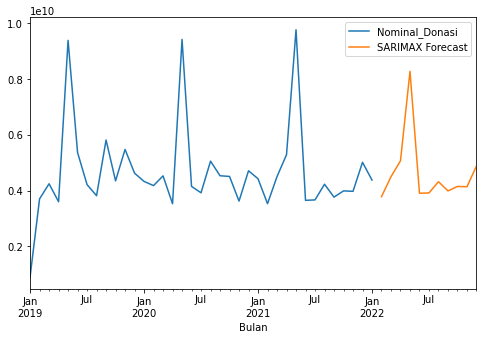

In [ ]:
df2_bulan.plot(legend=True,figsize=(8,5))
fcast.plot(legend=True)

In [ ]:
predict_dataframe = pd.DataFrame(fcast)

In [ ]:
predict_dataframe.head()

,SARIMAX Forecast
2022-02-01,3.781497e+09
2022-03-01,4.495354e+09
2022-04-01,5.065801e+09
2022-05-01,8.266611e+09
2022-06-01,3.903965e+09


In [ ]:
#prediksi donasi mizan amanah tahun 2022
np.sum(fcast)+np.mean(all_januari)

55271552499.167175

In [ ]:
df_concat = pd.concat([df2_bulan,predict_dataframe], axis=0)

In [ ]:
df_concat['Nominal_Donasi']= df_concat['Nominal_Donasi'].replace(np.nan,0)

In [ ]:
df_concat['SARIMAX Forecast']= df_concat['SARIMAX Forecast'].replace(np.nan,0)

In [ ]:
df_concat.reset_index(inplace= True)

In [ ]:
df_concat.dtypes

index               datetime64[ns]
Nominal_Donasi             float64
SARIMAX Forecast           float64
dtype: object

In [ ]:
df_concat.rename(columns={'index': 'Tanggal'}, inplace= True)

In [ ]:
df_concat.tail()

,Tanggal,Nominal_Donasi,SARIMAX Forecast
43,2022-08-01,0.0,4.317289e+09
44,2022-09-01,0.0,3.987634e+09
45,2022-10-01,0.0,4.147488e+09
46,2022-11-01,0.0,4.136517e+09
47,2022-12-01,0.0,4.878753e+09


#RFM

##RFM Cust Seg

In [ ]:
##THE LAST DATE DATA
latest_date = dt.datetime(2022,1,18)

In [ ]:
##GROUPING ID DONATUR
RFMScore = df1.groupby('ID_Donatur').agg({'Tanggal': lambda x:(latest_date - x.max()).days, 'ID_Donasi': lambda x: len(x),'Nominal_Donasi': lambda x: x.sum()})

In [ ]:
RFMScore['Tanggal'] = RFMScore['Tanggal'].astype(int)

In [ ]:
RFMScore.rename(columns={"Tanggal": "Recency",
                         "ID_Donasi": "Frequency",
                         "Nominal_Donasi": "Monetary"},inplace= True)

In [ ]:
RFMScore.reset_index().head()

,ID_Donatur,Recency,Frequency,Monetary
0,000054B5-72F9-86F4-B2B3-DCDF8AE3B277,606,1,200000
1,000098EC-C0A2-1198-033D-DCEF62F83DA0,17,8,2000000
2,00019858-2827-E3C0-7EC5-6359A76A82B5,570,1,300000
3,00022AFA-297F-CB23-9ADA-7500A9C81206,608,2,400000
4,00023482-3375-FB2C-FE84-9347A8B80D3A,204,1,500000


In [ ]:
#ranking data using pandas R,F,M
RFMScore['R_rank'] = RFMScore['Recency'].rank(ascending=False)

In [ ]:
RFMScore['F_rank'] = RFMScore['Frequency'].rank(ascending=True)

In [ ]:
RFMScore['M_rank'] = RFMScore['Monetary'].rank(ascending=True)

In [ ]:
def normaliz(a):
  a = (a/a.max())*100
  return a

In [ ]:
#Normaliz Data R,F,M
RFMScore['R_rank_norm'] = normaliz(RFMScore['R_rank'])

In [ ]:
RFMScore['F_rank_norm'] = normaliz(RFMScore['F_rank'])

In [ ]:
RFMScore['M_rank_norm'] = normaliz(RFMScore['M_rank'])

In [ ]:
#percentage for scoring data
RFMScore["Final_score"] = RFMScore['R_rank_norm']*0.15+RFMScore['F_rank_norm']* 0.28+ RFMScore['M_rank_norm']*0.57

In [ ]:
RFMScore['Final_score'] *= 0.05

In [ ]:
RFMScore['Final_score'] = RFMScore['Final_score'].round(2)

In [ ]:
RFMScore["Customer_segment"] = np.where(RFMScore['Final_score'] > 4.5, "Top Customers",
                                        (np.where(RFMScore['Final_score'] > 4,"High value Customer",
                                                  (np.where(RFMScore['Final_score'] > 3,"Medium Value Customer",
                                                            np.where(RFMScore['Final_score'] > 1.6,'Low Value Customers', 
                                                                     'Lost Customers'))))))


In [ ]:
RFMScore.sort_values(by= 'Final_score', ascending= False, inplace= True)

In [ ]:
RFMScore.tail(10)

,ID_Donatur,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,Final_score,Customer_segment
96029,639567B9-0FE0-D1CF-AA38-D87007A8D56D,1045,1,40000,2405.0,29492.0,386.0,2.504543,30.708358,0.401920,0.46,Lost Customers
96030,712DE3EE-770D-2185-6D5D-961B329C0C59,1035,1,40000,2887.5,29492.0,386.0,3.007014,30.708358,0.401920,0.46,Lost Customers
96031,355ECA62-46A8-89C2-0B71-DD3105C6BDAA,1036,1,10000,2848.5,29492.0,62.5,2.966400,30.708358,0.065078,0.45,Lost Customers
96032,5230A293-B33B-6518-281C-1C2636FCCF20,1047,1,0,2279.0,29492.0,15.5,2.373328,30.708358,0.016139,0.45,Lost Customers
96033,47943257-77B9-B520-D224-2E3B343E982A,1077,1,25000,662.5,29492.0,147.0,0.689921,30.708358,0.153063,0.44,Lost Customers
96034,F6107964-568D-9F5F-68B8-DEE199134575,1059,1,9000,1596.0,29492.0,50.0,1.662059,30.708358,0.052062,0.44,Lost Customers
96035,D769E35C-EA05-55C2-5BE6-DA57B7B3FAF7,1055,1,0,1776.0,29492.0,15.5,1.849509,30.708358,0.016139,0.44,Lost Customers
96036,EAF7FA64-9482-F258-D7B1-8EED92F0D387,1081,1,10000,402.0,29492.0,62.5,0.418639,30.708358,0.065078,0.43,Lost Customers
96037,CFCD0EEF-3F31-3BB7-461D-1F15545B5A3B,1087,1,0,98.5,29492.0,15.5,0.102577,30.708358,0.016139,0.43,Lost Customers
96038,9543E619-9339-56C6-DFDC-93F89F3C256C,1091,1,1000,45.5,29492.0,39.0,0.047383,30.708358,0.040609,0.43,Lost Customers


## Data Visualization RFM

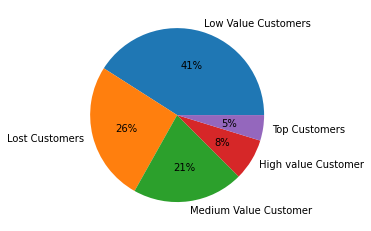

In [ ]:
plt.pie(RFMScore.Customer_segment.value_counts(),
        labels=RFMScore.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

## Data Ready To Use

In [ ]:
RFMScore.reset_index(inplace=True)

In [ ]:
#TAKE DATA FROM RFM MERGE
RFM_merge = RFMScore[['ID_Donatur','Customer_segment']]

In [ ]:
RFM_merge.head(2)

,ID_Donatur,Customer_segment
0,68617AC1-15B7-7FA5-6327-30C3A02C7EB9,Top Customers
1,44C08D74-2BF7-8859-F337-FDD812239831,Top Customers


In [ ]:
df1.head(2)

,ID_Donatur,Nama_Donatur,muzaki,ID_Donasi,Tanggal,Akad,Program,Metode_Pembayaran,Nominal_Donasi,Kantor_Pelayanan
159617,0AD64182-16C2-9675-EB4A-2F4C75A0AD49,EFENDI,Efendi,800303FA-C94B-DF0A-7C44-0C37F8F3B1CF,2019-01-01 20:45:00,Sedekah,No Category,Tunai,200000,KP044
245763,0427EF05-ABFD-EB37-243C-580C687BE822,EMI ANGGRAENI,EMI ANGGRAENI,DD51B141-16D1-CDA0-22F8-40E75D0799D1,2019-01-02 16:00:00,Zakat,No Category,Tunai,200000,KP044


In [ ]:
df1 = df1.merge(RFM_merge, how= 'left', on= 'ID_Donatur')

In [ ]:
#CHECK MISSING VALUE 
df1.isna().sum()

ID_Donatur           0
Nama_Donatur         0
muzaki               0
ID_Donasi            0
Tanggal              0
Akad                 0
Program              0
Metode_Pembayaran    0
Nominal_Donasi       0
Kantor_Pelayanan     0
Customer_segment     0
dtype: int64

In [ ]:
df1.dtypes

ID_Donatur                   object
Nama_Donatur                 object
muzaki                       object
ID_Donasi                    object
Tanggal              datetime64[ns]
Akad                         object
Program                      object
Metode_Pembayaran            object
Nominal_Donasi                int64
Kantor_Pelayanan             object
Customer_segment             object
dtype: object

In [ ]:
df1.drop(columns=['Nama_Donatur', 'muzaki', 'ID_Donasi'] , inplace=True)

#FINAL DATASET FOR DASHBOARD

In [ ]:
#EXPROT TO CSV
df1.to_csv('FINAL DATASET3.csv', index=False)

In [ ]:
df_concat.to_csv('concat.csv', index=False)